# Customer Churn Analysis & Prediction (IBM Telco Customer Churn Dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df = pd.read_csv(url)
print("Dataset shape:", df.shape)

Dataset shape: (7043, 21)


In [2]:
# Data Cleaning

# Replace blank strings in 'TotalCharges' with NaN and drop those rows
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

# Drop customerID (useless for prediction)
df = df.drop(['customerID'], axis=1)

In [3]:
# Encode categorical variables

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols)

# Encode target 'Churn' separately so we know it stays as y
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

# Encode other categorical columns
le = LabelEncoder()
for col in cat_cols:
    if col != 'Churn':
        df[col] = le.fit_transform(df[col])

Categorical columns: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [4]:
# Scale numeric features
num_cols = df.select_dtypes(include=['int64','float64']).columns
num_cols = num_cols.drop('Churn', errors='ignore')  # don't scale target

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

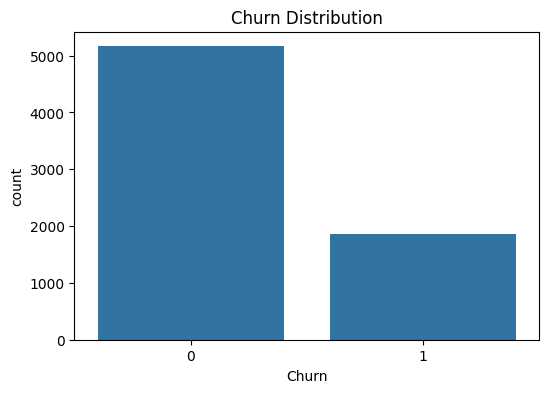

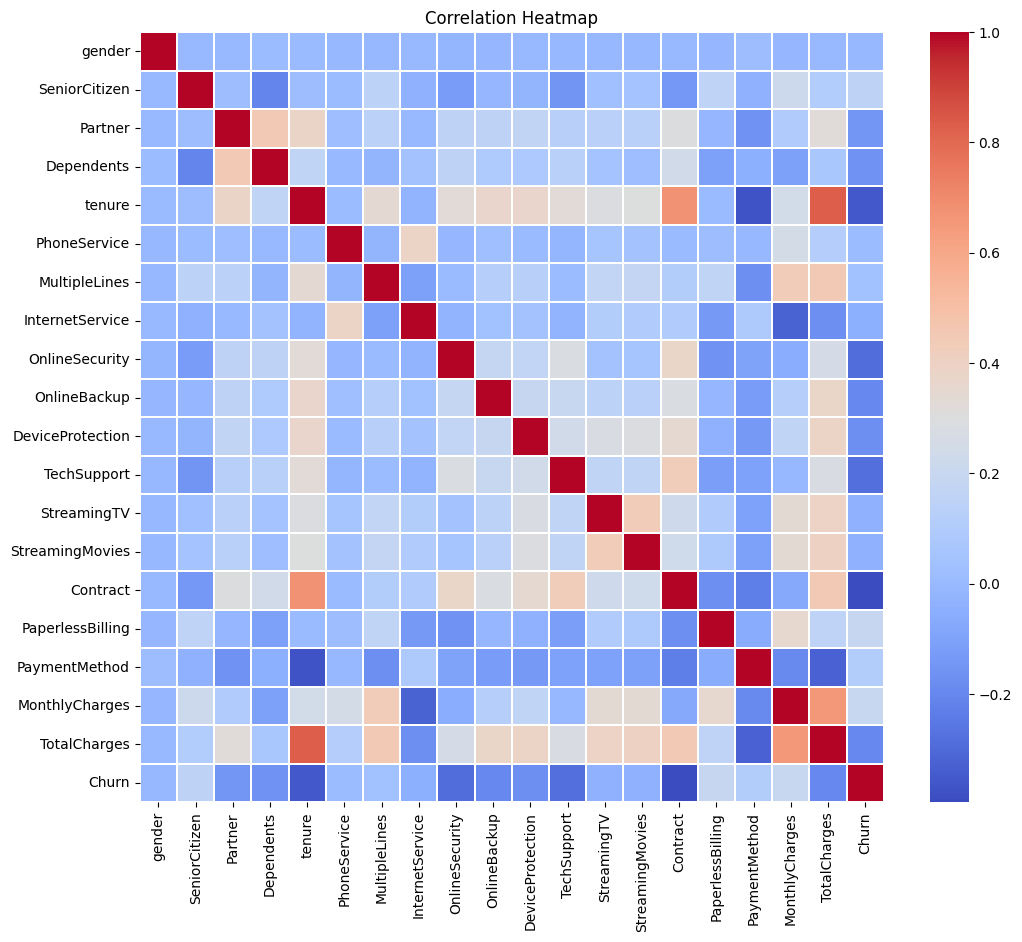

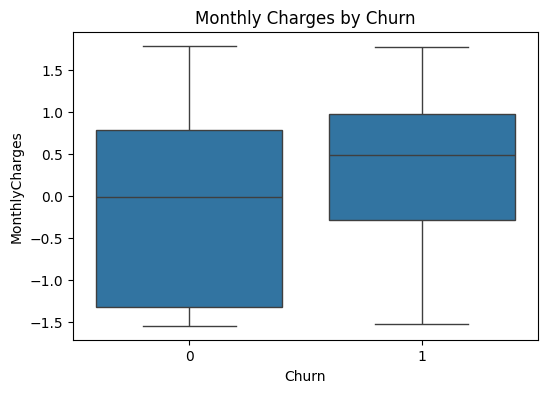

In [5]:
# EDA
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

In [6]:
# Split data & train models
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n--- {name} ---")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
    print("F1-score:", round(f1_score(y_test, y_pred), 2))
    print(classification_report(y_test, y_pred))


--- Logistic Regression ---
Accuracy: 0.79
F1-score: 0.59
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407


--- Random Forest ---
Accuracy: 0.78
F1-score: 0.54
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



C:\Users\MANASA\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:20:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- XGBoost ---
Accuracy: 0.76
F1-score: 0.53
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.56      0.51      0.53       374

    accuracy                           0.76      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.76      0.76      1407



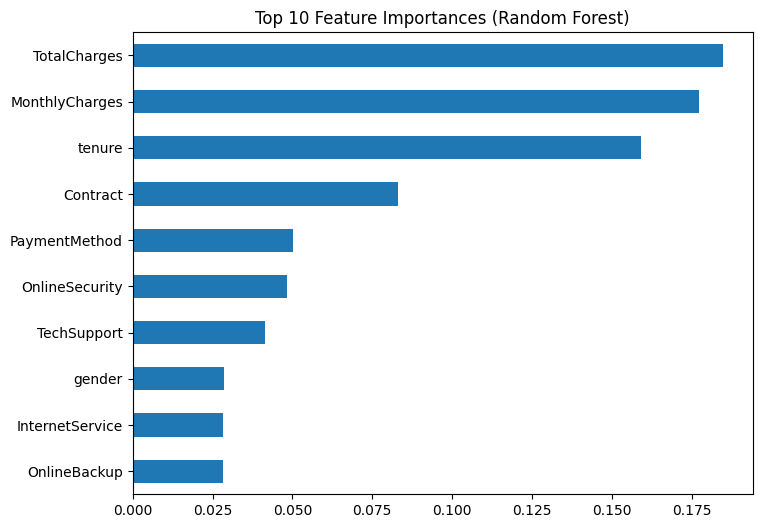

In [7]:
# Feature importance (Random Forest as example)
rf = models["Random Forest"]
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
importances[:10].plot(kind='barh')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

In [8]:
# Export cleaned data for Power BI
df.to_csv('telco_churn_cleaned.csv', index=False)
print("Cleaned dataset exported as 'telco_churn_cleaned.csv' for Power BI visualization.")

Cleaned dataset exported as 'telco_churn_cleaned.csv' for Power BI visualization.
